In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# if file is in the same directory
df = pd.read_csv('nba_2025_per_game.csv')


df.head()  # display first few rows

,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Awards
0,1,Shai Gilgeous-Alexander,26,OKC,PG,76,76,34.2,11.3,21.8,...,0.9,4.1,5,6.4,1.7,1,2.4,2.2,32.7,NaN
1,2,Giannis Antetokounmpo,30,MIL,PF,67,67,34.2,11.8,19.7,...,2.2,9.7,11.9,6.5,0.9,1.2,3.1,2.3,30.4,NaN
2,3,Nikola Jokić,29,DEN,C,70,70,36.7,11.2,19.5,...,2.9,9.9,12.7,10.2,1.8,0.6,3.3,2.3,29.6,NaN
3,4,Luka Dončić,25,2TM,PG,50,50,35.4,9.2,20.5,...,0.8,7.4,8.2,7.7,1.8,0.4,3.6,2.5,28.2,NaN
4,4,Luka Dončić,25,DAL,PG,22,22,35.7,9.8,21.2,...,0.7,7.6,8.3,7.8,2,0.4,3.4,2.6,28.1,NaN


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
df2 = pd.read_csv('Team_Stats_Per_Game.csv')
df2.head()  # display first few rows


,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Cleveland Cavaliers*,82,240.9,44.5,90.8,0.491,15.9,41.5,0.383,...,0.776,11.2,34.2,45.4,28.1,8.2,4.3,13.2,18.1,121.9
1,2.0,Memphis Grizzlies*,82,240.3,44.8,93.3,0.479,13.9,37.9,0.367,...,0.786,12.9,34.4,47.3,28.4,8.9,5.6,15.7,20.9,121.7
2,3.0,Denver Nuggets*,82,242.1,45.4,89.8,0.506,12.0,31.9,0.376,...,0.770,11.2,34.5,45.7,31.0,8.0,4.9,14.3,17.6,120.8
3,4.0,Oklahoma City Thunder*,82,240.3,44.6,92.7,0.482,14.5,38.8,0.374,...,0.819,10.6,34.2,44.8,26.9,10.3,5.7,11.7,19.9,120.5
4,5.0,Atlanta Hawks*,82,241.2,43.4,91.8,0.472,13.5,37.7,0.358,...,0.775,11.9,32.6,44.5,29.6,9.7,5.1,15.5,19.1,118.2


In [13]:
df3 = pd.read_csv('team_stats.csv')
df3.head()  # display first few rows

,Rk,Team,G,MP,FG,FGA,FG%,3P,3PA,3P%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1.0,Cleveland Cavaliers*,82,240.9,44.5,90.8,0.491,15.9,41.5,0.383,...,0.776,11.2,34.2,45.4,28.1,8.2,4.3,13.2,18.1,121.9
1,2.0,Memphis Grizzlies*,82,240.3,44.8,93.3,0.479,13.9,37.9,0.367,...,0.786,12.9,34.4,47.3,28.4,8.9,5.6,15.7,20.9,121.7
2,3.0,Denver Nuggets*,82,242.1,45.4,89.8,0.506,12.0,31.9,0.376,...,0.770,11.2,34.5,45.7,31.0,8.0,4.9,14.3,17.6,120.8
3,4.0,Oklahoma City Thunder*,82,240.3,44.6,92.7,0.482,14.5,38.8,0.374,...,0.819,10.6,34.2,44.8,26.9,10.3,5.7,11.7,19.9,120.5
4,5.0,Atlanta Hawks*,82,241.2,43.4,91.8,0.472,13.5,37.7,0.358,...,0.775,11.9,32.6,44.5,29.6,9.7,5.1,15.5,19.1,118.2


In [12]:
df4 = pd.read_csv('win_loss.csv')
df4.head()  # display first few rows

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Place,Unnamed: 4,Conference,Unnamed: 6,Division,Unnamed: 8,Unnamed: 9,...,Unnamed: 14,Margin,Unnamed: 16,Month,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23
0,Rk,Team,Overall,Home,Road,E,W,A,C,SE,...,Post,≤3,≥10,Oct,Nov,Dec,Jan,Feb,Mar,Apr
1,1,Oklahoma City Thunder,68-14,36-6,32-8,29-1,39-13,Oct-00,1-Sep,Oct-00,...,24-4,4-Jan,54-5,Apr-00,4-Nov,1-Dec,4-Oct,2-Nov,15-1,2-May
2,2,Cleveland Cavaliers,64-18,34-7,30-11,41-11,23-7,16-3,4-Dec,13-4,...,20-8,4-May,41-7,May-00,3-Dec,1-Dec,5-Oct,1-Oct,5-Nov,3-Apr
3,3,Boston Celtics,61-21,28-13,33-8,39-13,22-8,14-2,6-Dec,13-5,...,22-5,3-Aug,41-7,1-Apr,2-Dec,6-Aug,6-Oct,3-Aug,14-1,2-May
4,4,Houston Rockets,52-30,29-12,23-18,21-9,31-21,4-Jun,3-Jul,2-Aug,...,18-9,5-Aug,26-12,2-Mar,4-Nov,5-Jul,4-Nov,7-May,5-Dec,3-Mar


In [10]:
df5 = pd.read_csv('Win_Loss_Offense_Defence.csv')
df5.head()  # display first few rows

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Defense Four Factors,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Rk,Team,Age,W,L,PW,PL,MOV,SOS,SRS,...,FT/FGA,NaN,eFG%,TOV%,DRB%,FT/FGA,NaN,Arena,Attend.,Attend./G
1,1,Oklahoma City Thunder*,24.8,68,14,68,14,12.87,-0.16,12.7,...,0.18,NaN,0.513,14.9,74.6,0.211,NaN,Paycom Center,"754,832","17,973"
2,2,Boston Celtics*,28.9,61,21,62,20,9.11,-0.83,8.28,...,0.169,NaN,0.522,11.6,76,0.154,NaN,TD Garden,"785,396","19,156"
3,3,Cleveland Cavaliers*,26.6,64,18,62,20,9.54,-0.73,8.81,...,0.187,NaN,0.528,12.6,74.8,0.181,NaN,Rocket Arena,"796,712","19,432"
4,4,Minnesota Timberwolves*,27.2,49,33,53,29,5,0.15,5.15,...,0.196,NaN,0.532,13.2,75.1,0.178,NaN,Target Center,"772,249","18,835"


In [11]:
df5.columns = df5.iloc[0]  # set the first row as the header
df5 = df5.drop(0)  # drop the first row
df5 = df5.reset_index(drop=True)  # reset the index
display(df5.columns)  # display column names


Index([       'Rk',      'Team',       'Age',         'W',         'L',
              'PW',        'PL',       'MOV',       'SOS',       'SRS',
            'ORtg',      'DRtg',      'NRtg',      'Pace',       'FTr',
            '3PAr',       'TS%',         nan,      'eFG%',      'TOV%',
            'ORB%',    'FT/FGA',         nan,      'eFG%',      'TOV%',
            'DRB%',    'FT/FGA',         nan,     'Arena',   'Attend.',
       'Attend./G'],
      dtype='object', name=0)

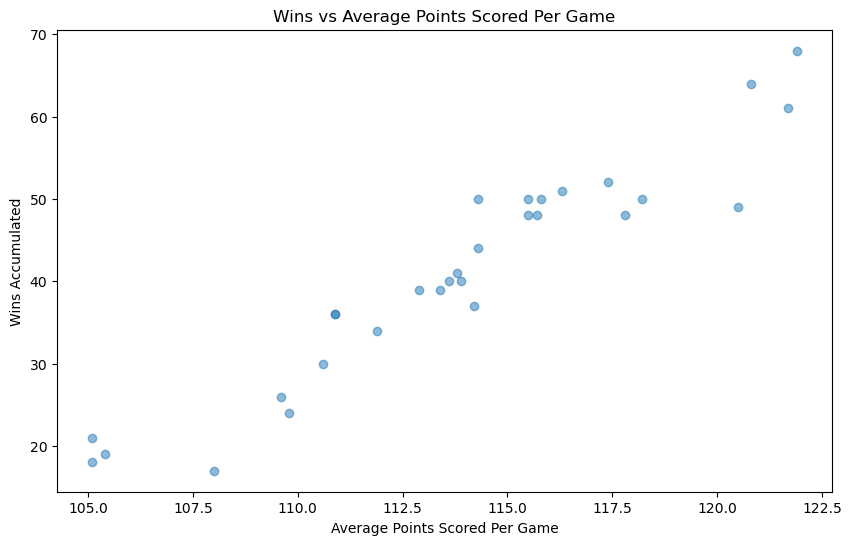

In [14]:
df2['PTS'] = pd.to_numeric(df2['PTS'], errors='coerce')
df5['W'] = pd.to_numeric(df5['W'], errors='coerce')

valid_data = df2[['PTS']].join(df5[['W']]).dropna()

plt.figure(figsize=(10, 6))
plt.scatter(valid_data['PTS'], valid_data['W'], alpha=0.5)
plt.xlabel('Average Points Scored Per Game')
plt.ylabel('Wins Accumulated')
plt.title('Wins vs Average Points Scored Per Game')
plt.show()

In [15]:
df5['PW'] = pd.to_numeric(df5['PW'], errors='coerce')
df5['DRB%'] = pd.to_numeric(df5['DRB%'], errors='coerce')

correlation_coefficient = df5['PW'].corr(df5['DRB%'])
print(f"Correlation Coefficient between Points Won and Defensive Rebound Percentage: {correlation_coefficient:.2f}")


Correlation Coefficient between Points Won and Defensive Rebound Percentage: 0.53


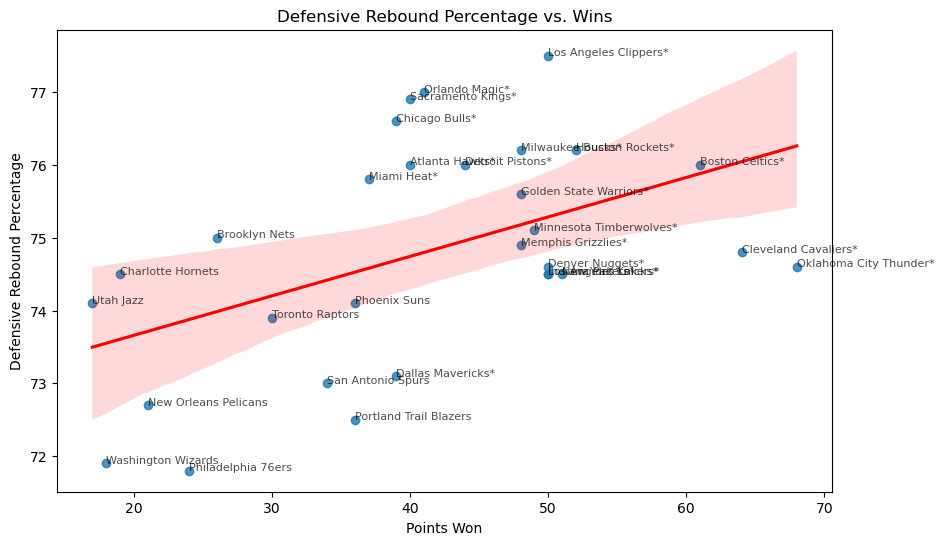

In [16]:
plt.figure(figsize=(10, 6))
sns.regplot(x='W', y='DRB%', data=df5, line_kws={'color': 'red'})
plt.xlabel('Points Won')
plt.ylabel('Defensive Rebound Percentage')
for idx, team in enumerate(df5['Team']):
    plt.annotate(team, (df5['W'][idx], df5['DRB%'][idx]), fontsize=8, alpha=0.7)
plt.title('Defensive Rebound Percentage vs. Wins')
plt.show()

In [18]:
player_df = pd.read_csv('nba_2025_per_game.csv')

# Convert relevant columns to numeric, errors='coerce' will turn non-numeric values into NaN
cols_to_numeric = [
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%', 'ORB', 'DRB', 'MP', 'FGA', 'FG'
]
player_df[cols_to_numeric] = player_df[cols_to_numeric].apply(pd.to_numeric, errors='coerce')

team_stats = player_df.groupby('Team').agg({
    'PTS': 'mean',
    'AST': 'mean',
    'TRB': 'mean',
    'STL': 'mean',
    'BLK': 'mean',
    'TOV': 'mean',
    'FG%': 'mean',
    '3P%': 'mean',
    'FT%': 'mean',
    'ORB': 'mean',
    'DRB': 'mean',
    'TRB': 'mean',
    'MP': 'mean',
    'FGA': 'mean',
    'FG': 'mean',
}).reset_index()
display(team_stats)

,Team,PTS,AST,TRB,STL,BLK,TOV,FG%,3P%,FT%,ORB,DRB,MP,FGA,FG
0,2TM,7.692208,2.028571,3.314286,0.637662,0.359740,1.041558,0.458377,0.326194,0.731737,0.854545,2.459740,18.201299,6.158442,2.816883
1,3TM,6.175000,1.975000,2.775000,0.425000,0.225000,0.975000,0.436500,0.280750,0.780000,0.775000,2.025000,15.400000,5.125000,2.200000
2,ATL,10.985714,2.390476,4.004762,0.771429,0.438095,1.242857,0.478238,0.350476,0.765200,1.023810,2.990476,22.376190,8.485714,4.019048
3,BOS,8.666667,1.900000,3.677778,0.611111,0.466667,0.872222,0.422611,0.292000,0.763000,0.927778,2.738889,19.088889,6.838889,3.094444
4,BRK,9.508333,2.475000,3.475000,0.662500,0.350000,1.291667,0.421833,0.347000,0.748217,0.891667,2.583333,21.783333,7.862500,3.383333
5,CHI,8.759091,2.227273,3.381818,0.577273,0.309091,0.977273,0.489500,0.355381,0.821238,0.813636,2.568182,18.181818,6.790909,3.236364
6,CHO,8.892593,2.318519,3.740741,0.729630,0.403704,1.418519,0.415333,0.293077,0.772920,1.037037,2.711111,21.203704,7.674074,3.214815
7,CLE,8.580952,1.914286,3.376190,0.547619,0.319048,0.880952,0.450667,0.312238,0.748158,0.866667,2.519048,17.957143,6.647619,3.128571
8,DAL,10.075000,2.191667,4.195833,0.687500,0.550000,1.170833,0.508625,0.337950,0.745130,0.966667,3.233333,20.641667,7.679167,3.795833
9,DEN,8.994118,2.347059,3.641176,0.611765,0.394118,1.064706,0.467235,0.319875,0.750188,0.917647,2.735294,19.123529,6.835294,3.388235


In [19]:
import numpy as np

# Use df5 as the wins dataframe
team_wins_df = df5

# Remove non-team rows from team_stats (e.g., summary or 'Team' rows)
team_stats_clean = team_stats[~team_stats['Team'].isin(['Team', 'League Average'])].copy()

# Remove non-team rows from team_wins_df (e.g., header or summary rows)
team_wins_df_clean = team_wins_df[~team_wins_df['Team'].isin(['Team', 'League Average', None, np.nan])].copy()

# Standardize 'Team' names for merging (remove trailing '*' and strip whitespace)
team_stats_clean['Team'] = team_stats_clean['Team'].str.replace('*', '', regex=False).str.strip()
team_wins_df_clean['Team'] = team_wins_df_clean['Team'].str.replace('*', '', regex=False).str.strip()

# Mapping from abbreviation to full team name
abbr_to_full = {
    "ATL": "Atlanta Hawks",
    "BOS": "Boston Celtics",
    "BRK": "Brooklyn Nets",
    "CHI": "Chicago Bulls",
    "CHO": "Charlotte Hornets",
    "CLE": "Cleveland Cavaliers",
    "DAL": "Dallas Mavericks",
    "DEN": "Denver Nuggets",
    "DET": "Detroit Pistons",
    "GSW": "Golden State Warriors",
    "HOU": "Houston Rockets",
    "IND": "Indiana Pacers",
    "LAC": "Los Angeles Clippers",
    "LAL": "Los Angeles Lakers",
    "MEM": "Memphis Grizzlies",
    "MIA": "Miami Heat",
    "MIL": "Milwaukee Bucks",
    "MIN": "Minnesota Timberwolves",
    "NOP": "New Orleans Pelicans",
    "NYK": "New York Knicks",
    "OKC": "Oklahoma City Thunder",
    "ORL": "Orlando Magic",
    "PHI": "Philadelphia 76ers",
    "PHO": "Phoenix Suns",
    "POR": "Portland Trail Blazers",
    "SAC": "Sacramento Kings",
    "SAS": "San Antonio Spurs",
    "TOR": "Toronto Raptors",
    "UTA": "Utah Jazz",
    "WAS": "Washington Wizards"
}

# Map abbreviations to full names for merging
team_stats_clean['Team_Full'] = team_stats_clean['Team'].map(abbr_to_full)
# Drop rows where mapping failed (e.g., '2TM', '3TM', etc.)
team_stats_clean = team_stats_clean.dropna(subset=['Team_Full'])

# Merge using the mapped full team names
data = pd.merge(
    team_stats_clean,
    team_wins_df_clean[['Team', 'W']],
    left_on='Team_Full',
    right_on='Team',
    how='inner'
)

if data.shape[0] == 0:
    raise ValueError("No matching teams found after cleaning. Check team name formatting.")

X = data[[
    'PTS', 'AST', 'TRB', 'STL', 'BLK', 'TOV', 'FG%', '3P%', 'FT%', 'ORB', 'DRB', 'MP', 'FGA', 'FG'
]]
Y = data['W']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
display(Y_pred)

array([30.28816948, 45.0852309 , 44.00566484, 46.95280166, 40.11680447,
       65.25129854])

In [20]:
r2 = r2_score(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
coefficients = coefficients.sort_values(by='Coefficient', key=abs, ascending=False)
display(coefficients)


,Feature,Coefficient
6,FG%,-142.052201
2,TRB,131.934427
10,DRB,-121.616585
9,ORB,-109.095545
8,FT%,-77.245718
7,3P%,-73.027921
3,STL,52.682067
5,TOV,-51.395232
0,PTS,43.447270
4,BLK,-33.554181


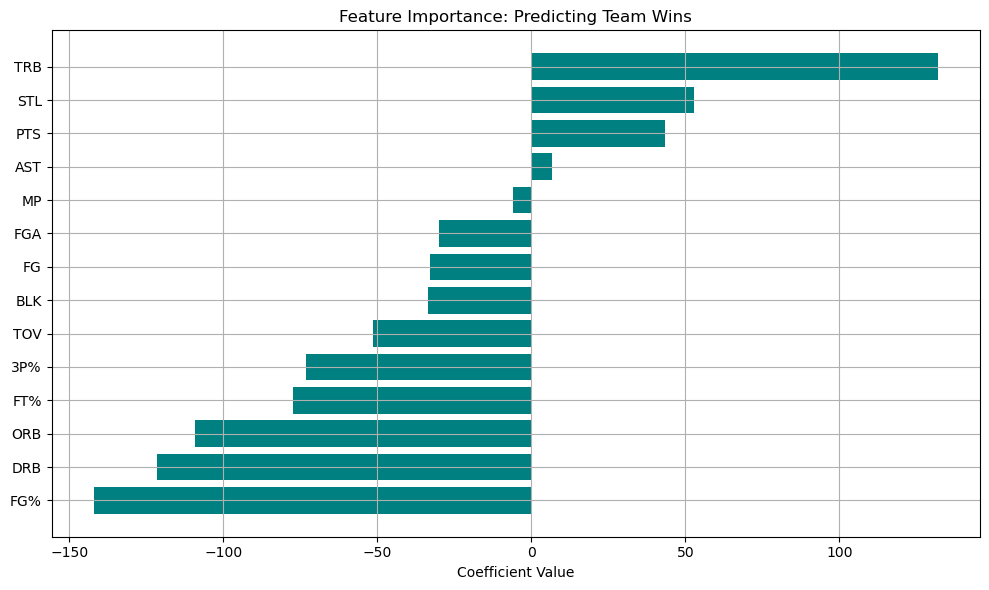

In [21]:
#Regression Coefficients Diverging Bar Chart (Feature Importance)
import matplotlib.pyplot as plt

# Ensure data is clean and sorted
coefficients_sorted = coefficients.sort_values(by='Coefficient', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(
    y=coefficients_sorted['Feature'].astype(str),
    width=coefficients_sorted['Coefficient'].astype(float),
    color='teal'
)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance: Predicting Team Wins')
plt.grid(True)
plt.tight_layout()
plt.show()


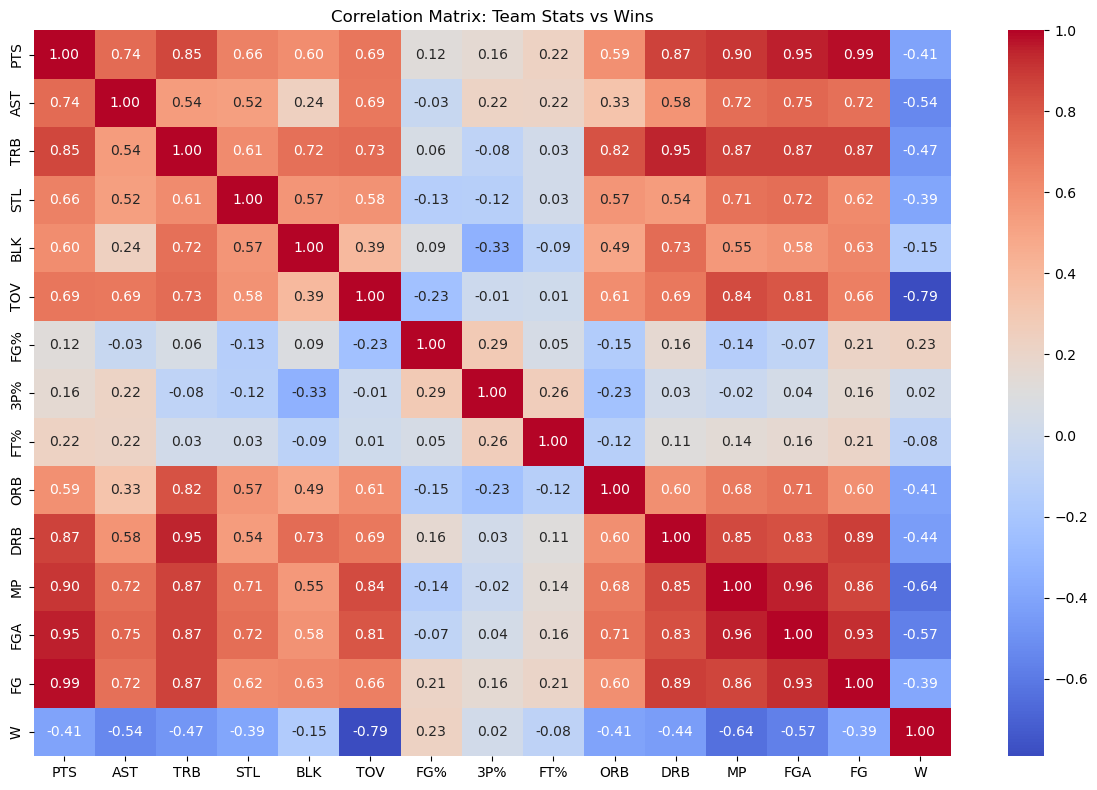

In [22]:
# Heatmap: Correlation Matrix of Stats + Wins
import seaborn as sns

# Add the target column to data to build correlation matrix
data_corr = data[X.columns.tolist() + ['W']]

plt.figure(figsize=(12, 8))
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix: Team Stats vs Wins')
plt.tight_layout()
plt.show()

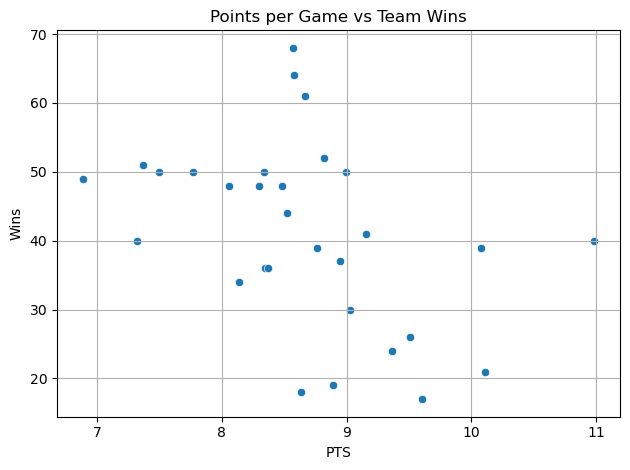

In [23]:
#Scatterplot Example: WinsShares (WS) vs Wins

# Example with Points per Game (PTS)
sns.scatterplot(data=data, x='PTS', y='W')
plt.title('Points per Game vs Team Wins')
plt.xlabel('PTS')
plt.ylabel('Wins')
plt.grid(True)
plt.tight_layout()
plt.show()